In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
np.random.seed(2020)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wsy88\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Doc2Vec

In [3]:
raw_train_data = pd.read_csv("D:\\machinelearningprojects\\nlp-getting-started\\train.csv")

In [4]:
raw_train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
#from sklearn.model_selection import train_test_split
train_data = raw_train_data.loc[:0.8*len(raw_train_data)]
test_data = raw_train_data.loc[0.8*len(raw_train_data):]

In [6]:
train_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
6086,8693,sinking,Sacramento,After a Few Years Afloat Pension Plans Start S...,1
6087,8694,sinking,NaN,Do you feel like you are sinking in unhappines...,0
6088,8695,sinking,"Vancouver, British Columbia",With a sinking music video tv career Brooke Ho...,0
6089,8696,sinking,NaN,@supernovalester I feel so bad for them. I can...,0


In [7]:
def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')

In [8]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [9]:
def is_http(text):
    regex = re.compile('htt.')
    return re.search(regex, text)

In [24]:
def preprocess(text):
    result = []
    for token in simple_preprocess(text):
       # print(token)
        if token not in STOPWORDS and not is_http(token):
            result.append(remove_emoji(token))
    return result

In [25]:
preprocessed_train_data = []
for sample in train_data['text']:
    #print(sample)
    words = []
    for word in sample.split(' '):
        words.append(word)
    preprocessed_train_data.append(preprocess(sample))


In [26]:
preprocessed_test_data = []
for sample in test_data['text']:
    #print(sample)
    words = []
    for word in sample.split(' '):
        words.append(word)
    preprocessed_test_data.append(preprocess(sample))

In [13]:
#from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
train_documents = [TaggedDocument(doc, tags = str(train_data['target'].iloc[i])) for i, doc in enumerate(preprocessed_train_data)]
cores = 4
model_dbow = Doc2Vec(dm=1, vector_size=150, negative=5, hs=0, min_count=2, sample = 0, workers=cores, alpha=0.025, min_alpha=0.001)

In [14]:
print(train_documents[1])

TaggedDocument(['forest', 'near', 'la', 'ronge', 'sask', 'canada'], 1)


In [15]:
from tqdm import tqdm
from sklearn import utils
model_dbow.build_vocab([x for x in train_documents])
train_documents  = utils.shuffle(train_documents)
model_dbow.train(train_documents,total_examples=len(train_documents), epochs=30)
def vector_for_learning(model, input_docs):
    sents = input_docs
    targets, feature_vectors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, feature_vectors
model_dbow.save('./twitterModel.d2v')

In [16]:
test_documents = [TaggedDocument(doc, tags = str(test_data['target'].iloc[i])) for i, doc in enumerate(preprocessed_test_data)]

In [17]:
print(preprocessed_test_data)

[['horrible', 'sinking', 'feeling', 'ûªve', 'home', 'phone', 'realise', 'time'], ['nigga', 'car', 'sinking', 'snapping', 'fox', 'priorities', 'stlkh', 'fb'], ['abandonedpics', 'delete', 'abbandoned', 'sinking', 'ûªs', 'darsena', 'castello', 'scaligero', 'di', 'sirmione'], ['horrible', 'sinking', 'feeling', 'ûªve', 'home', 'phone', 'realise', 'time'], ['equipment', 'ego', 'break', 'dig', 'family', 'internet', 'hoke', 'excepting', 'versus', 'sinking', 'term', 'dfljev'], ['currency', 'transgress', 'payday', 'prison', 'ward', 'sinking', 'fund', 'payment', 'unsecured', 'loan', 'jbumzqpk'], ['horrible', 'sinking', 'feeling', 'ûªve', 'home', 'phone', 'realise', 'time'], ['lost', 'sinking', 'like', 'stone', 'carry', 'onnnn'], ['lying', 'clinton', 'sinking', 'donald', 'trump', 'singing', 'let', 'america', 'great', 'zv', 'chjclf'], ['ap', 'slow', 'report', 'sinking', 'boat', 'mediterranean', 'sea', 'shame'], ['walk', 'plank', 'sinking', 'ship'], ['sinking', 'ship', 'sinkingshipindy', 'scarlet', 

In [62]:
y_train, X_train = vector_for_learning(model_dbow, train_documents)
y_test, X_test = vector_for_learning(model_dbow, test_documents)

In [63]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e4)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\Users\wsy88\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[569, 244],
       [226, 483]], dtype=int64)

In [65]:
from sklearn.metrics import f1_score

In [66]:
y_test2 = list(map(lambda x:int(x), y_test))
y_pred = list(map(lambda x:int(x), y_pred))

In [67]:
f1_score(y_test2, y_pred)

0.6727019498607242

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_reduced = pca.fit_transform(X_train)
#X_train_reduced[y_train == '1',0]

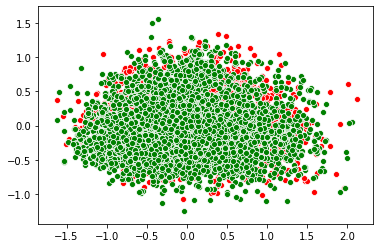

In [69]:
sns.scatterplot(x=X_train_reduced[list(map(lambda x: x == '1', y_train)),0],
                y=X_train_reduced[list(map(lambda x: x == '1', y_train)),1], color = 'r')

sns.scatterplot(x=X_train_reduced[list(map(lambda x: x == '0', y_train)),0],
                y=X_train_reduced[list(map(lambda x: x == '0', y_train)),1], color = 'g')

# Baseline model with tf-idf

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [27]:
preprocessed_traindata_new = []
for s in preprocessed_train_data:
    preprocessed_traindata_new.append(' '.join(elem for elem in s))
    
preprocessed_testdata_new = []
for s in preprocessed_test_data:
    preprocessed_testdata_new.append(' '.join(elem for elem in s))

In [114]:
preprocessed_traindata_new

['deeds reason earthquake allah forgive',
 'forest near la ronge sask canada',
 'residents asked shelter place notified officers evacuation shelter place orders expected',
 'people receive wildfires evacuation orders california',
 'got sent photo ruby alaska smoke wildfires pours school',
 'rockyfire update california hwy closed directions lake county cafire wildfires',
 'flood disaster heavy rain causes flash flooding streets manitou colorado springs areas',
 'hill woods',
 'emergency evacuation happening building street',
 'afraid tornado coming area',
 'people died heat wave far',
 'haha south tampa getting flooded hah wait second live south tampa gonna gonna fvck flooding',
 'raining flooding florida tampabay tampa days ve lost count',
 'flood bago myanmar arrived bago',
 'damage school bus multi car crash breaking',
 'man',
 'love fruits',
 'summer lovely',
 'car fast',
 'goooooooaaaaaal',
 'ridiculous',
 'london cool',
 'love skiing',
 'wonderful day',
 'looooool',
 'way eat shit

In [115]:
tfidf = TfidfVectorizer()
pipeline = Pipeline([('tfidf', tfidf),
                     ('clf', LogisticRegression(random_state=42, C=1e4))])
pipeline.fit(preprocessed_traindata_new, train_data['target'])

C:\Users\wsy88\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=10000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_sca

In [116]:
#X=tfidf.fit_transform(train_data['text'])

In [117]:
predictions = pipeline.predict(preprocessed_testdata_new)
f1_score(test_data['target'], predictions)
#print(f'F1 score of baseline model: {f1_score(test_data['target'], predictions)}')

0.7438356164383562

In [118]:
confusion_matrix(test_data['target'], predictions)

array([[605, 208],
       [166, 543]], dtype=int64)

# Glove Embedding + LSTM model

In [131]:
!pip install keras

In [139]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [180]:
import tensorflow 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.optimizers import Adam
from keras.initializers import Constant

In [169]:
t = Tokenizer()
t.fit_on_texts(preprocessed_traindata_new)

In [170]:
vocab_size = len(t.word_index)+1

In [171]:
# integer encode the documents
encoded_docs = t.texts_to_sequences(preprocessed_traindata_new)

In [172]:
max_length = 50
padded_docs = pad_sequences(encoded_docs, max_length, padding = 'post')

In [185]:
encoded_docs_test = t.texts_to_sequences(preprocessed_testdata_new)
padded_docs_test = pad_sequences(encoded_docs_test, max_length, padding='post')

In [173]:
print(padded_docs)

[[ 3800   623   220 ...     0     0     0]
 [   54    98   491 ...     0     0     0]
 [ 1371  1107  1558 ...     0     0     0]
 ...
 [ 1079   387    10 ...     0     0     0]
 [18560   130   172 ...     0     0     0]
 [  550  1079   547 ...     0     0     0]]


In [174]:
# load the whole embedding into memory
embeddings_index = dict()

In [175]:
f = open('D:\\machinelearningprojects\\nlp-getting-started\\glove.6B.100d.txt\\glove.6B.100d.txt',
         encoding="utf8")
i = 0
for line in f:
    values = line.split()
    word = values[0]
    #print(word, values[1:])
    try:
        vectors = np.asarray(values[1:], dtype = 'float32')
        embeddings_index[word] = vectors
    except:
        print('# {} has issue!'.format(i))
    
    i = i + 1
    #coefs = asarray(values[1:], dtype = 'float32')
    #embeddings_index[word] = coefs
f.close()

In [242]:
len(embeddings_index)

400000

In [156]:
#have a fun digression, which word is closest to China?
import math
def cosine_similarity(v1,v2):
    "compute cosine similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/math.sqrt(sumxx*sumyy)

v = embeddings_index['china']
vv = []
for s,t in enumerate(embeddings_index):
    vv.append({t:cosine_similarity(embeddings_index[t], v)})


In [165]:
vv_new = []
vv_values = []
for dicts in vv:
    for keys in dicts:
        if(keys != 'china' and keys != 'beijing' and keys != 'chinese' and keys != 'taiwan' and keys != 'mainland'):
            vv_values.append(dicts[keys])
            vv_new.append(dicts)

In [166]:
vv_new[vv_values.index(max(vv_values))]

{'korea': 0.7463888650972456}

In [263]:
## I would like to try word2vec instead of glove!
from gensim import models

w = models.KeyedVectors.load_word2vec_format(  \
    'D:\\machinelearningprojects\\nlp-getting-started\\GoogleNews-vectors-negative300.bin', binary=True)

In [273]:
type(w)

gensim.models.keyedvectors.Word2VecKeyedVectors

In [279]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
    if word in w.wv.vocab:
        embedding_vector = w[word]
    #embedding_vector = embeddings_index.get(word)   for glove
    #if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

C:\Users\wsy88\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [288]:
#LSTM model
model = Sequential()
embedding = Embedding(vocab_size, 300, embeddings_initializer = Constant(embedding_matrix),
                     input_length = max_length, trainable = False)
model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(learning_rate = 1e-5)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [289]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 300)           5569200   
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 50, 300)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 128)               219648    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 5,788,977
Trainable params: 219,777
Non-trainable params: 5,569,200
_________________________________________________________________


In [290]:
history = model.fit(padded_docs, train_data['target'], batch_size=4, epochs=15,
                   validation_data=(padded_docs_test, test_data['target']), verbose = 2)

Train on 6091 samples, validate on 1522 samples
Epoch 1/15
 - 66s - loss: 0.6878 - accuracy: 0.5791 - val_loss: 0.6779 - val_accuracy: 0.5342
Epoch 2/15
 - 66s - loss: 0.5824 - accuracy: 0.7076 - val_loss: 0.4948 - val_accuracy: 0.8029
Epoch 3/15
 - 66s - loss: 0.5390 - accuracy: 0.7439 - val_loss: 0.4662 - val_accuracy: 0.8062
Epoch 4/15
 - 65s - loss: 0.5298 - accuracy: 0.7564 - val_loss: 0.4540 - val_accuracy: 0.8127
Epoch 5/15
 - 65s - loss: 0.5205 - accuracy: 0.7608 - val_loss: 0.4517 - val_accuracy: 0.8121
Epoch 6/15
 - 65s - loss: 0.5083 - accuracy: 0.7670 - val_loss: 0.4418 - val_accuracy: 0.8134
Epoch 7/15
 - 65s - loss: 0.5133 - accuracy: 0.7741 - val_loss: 0.4494 - val_accuracy: 0.8154
Epoch 8/15
 - 65s - loss: 0.5069 - accuracy: 0.7702 - val_loss: 0.4470 - val_accuracy: 0.8167
Epoch 9/15
 - 65s - loss: 0.5083 - accuracy: 0.7728 - val_loss: 0.4373 - val_accuracy: 0.8134
Epoch 10/15
 - 66s - loss: 0.4994 - accuracy: 0.7780 - val_loss: 0.4330 - val_accuracy: 0.8127
Epoch 11/15

In [291]:
y_test_pred = model.predict(padded_docs_test, batch_size=4)

In [292]:
from sklearn.metrics import confusion_matrix, f1_score
confusion_matrix(test_data['target'], y_test_pred > 0.5)
f1_score(test_data['target'], y_test_pred > 0.5)

0.7857695282289251

In [293]:
preprocessed_realtrain_data = []
for sample in raw_train_data['text']:
    #print(sample)
    words = []
    for word in sample.split(' '):
        words.append(word)
    preprocessed_realtrain_data.append(preprocess(sample))
    
preprocessed_realtraindata_new = []
for s in preprocessed_realtrain_data:
    preprocessed_realtraindata_new.append(' '.join(elem for elem in s))
    
encoded_docs_realtrain = t.texts_to_sequences(preprocessed_realtraindata_new)
padded_docs_realtrain = pad_sequences(encoded_docs_realtrain, max_length, padding='post')

history = model.fit(padded_docs_realtrain, raw_train_data['target'], batch_size=4, epochs=15,
                   validation_data=(padded_docs_test, test_data['target']), verbose = 2)

Train on 7613 samples, validate on 1522 samples
Epoch 1/15
 - 79s - loss: 0.4836 - accuracy: 0.7868 - val_loss: 0.4267 - val_accuracy: 0.8193
Epoch 2/15
 - 79s - loss: 0.4900 - accuracy: 0.7834 - val_loss: 0.4269 - val_accuracy: 0.8206
Epoch 3/15
 - 79s - loss: 0.4831 - accuracy: 0.7880 - val_loss: 0.4184 - val_accuracy: 0.8193
Epoch 4/15
 - 79s - loss: 0.4833 - accuracy: 0.7897 - val_loss: 0.4174 - val_accuracy: 0.8233
Epoch 5/15
 - 79s - loss: 0.4861 - accuracy: 0.7892 - val_loss: 0.4146 - val_accuracy: 0.8226
Epoch 6/15
 - 79s - loss: 0.4854 - accuracy: 0.7856 - val_loss: 0.4159 - val_accuracy: 0.8252
Epoch 7/15
 - 79s - loss: 0.4825 - accuracy: 0.7927 - val_loss: 0.4125 - val_accuracy: 0.8193
Epoch 8/15
 - 78s - loss: 0.4832 - accuracy: 0.7892 - val_loss: 0.4147 - val_accuracy: 0.8285
Epoch 9/15
 - 78s - loss: 0.4719 - accuracy: 0.7956 - val_loss: 0.4134 - val_accuracy: 0.8292
Epoch 10/15
 - 78s - loss: 0.4818 - accuracy: 0.7955 - val_loss: 0.4093 - val_accuracy: 0.8305
Epoch 11/15

In [294]:
raw_test_data = pd.read_csv("D:\\machinelearningprojects\\nlp-getting-started\\test.csv")

In [295]:
preprocessed_realtest_data = []
for sample in raw_test_data['text']:
    #print(sample)
    words = []
    for word in sample.split(' '):
        words.append(word)
    preprocessed_realtest_data.append(preprocess(sample))

In [296]:
preprocessed_realtestdata_new = []
for s in preprocessed_realtest_data:
    preprocessed_realtestdata_new.append(' '.join(elem for elem in s))

In [297]:
encoded_docs_realtest = t.texts_to_sequences(preprocessed_realtestdata_new)
padded_docs_realtest = pad_sequences(encoded_docs_realtest, max_length, padding='post')

In [298]:
y_realtest_pred = model.predict(padded_docs_realtest, batch_size=4)

In [299]:
output = pd.DataFrame(np.zeros([len(y_realtest_pred), 2]), columns=['id','target'])

In [300]:
output['id'] = raw_test_data['id']
output['target'] = (y_realtest_pred > 0.5).astype(int)

In [301]:
output.to_csv('D:\\machinelearningprojects\\nlp-getting-started\\output2.csv',index=False)

# Bert model just practice

In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch

ModuleNotFoundError: No module named 'torch'

In [1]:
import torch

In [2]:
pip install pytorch-pretrained-bert pytorch-nlp

  Using cached https://files.pythonhosted.org/packages/d7/e0/c08d5553b89973d9a240605b9c12404bcf8227590de62bae27acbcfe076b/pytorch_pretrained_bert-0.6.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/4f/51/f0ee1efb75f7cc2e3065c5da1363d6be2eec79691b2821594f3f2329528c/pytorch_nlp-0.5.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/87/61/a3d8311dccec246605983a39b074eb175338f21cba774db0163e5ad0a139/regex-2020.1.8-cp37-cp37m-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


In [19]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

device = torch.device("cpu") #"cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'GeForce GTX 1660 Ti'

In [20]:
raw_train_data = pd.read_csv("D:\\machinelearningprojects\\nlp-getting-started\\train.csv")

In [8]:
raw_train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
sentences = ["[CLS] " + query + " [SEP]" for query in raw_train_data['text']]

In [5]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
print(tokenized_texts[0])

['[CLS]', 'our', 'deeds', 'are', 'the', 'reason', 'of', 'this', '#', 'earthquake', 'may', 'allah', 'forgive', 'us', 'all', '[SEP]']


In [6]:
MAX_LEN = 128
input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                         maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [7]:
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long",
                          truncating="post", padding="post")
print(input_ids)

[[  101  2256 15616 ...     0     0     0]
 [  101  3224  2543 ...     0     0     0]
 [  101  2035  3901 ...     0     0     0]
 ...
 [  101 23290  1012 ...     0     0     0]
 [  101  2610 11538 ...     0     0     0]
 [  101  1996  6745 ...     0     0     0]]


In [8]:
attention_masks = []
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

In [22]:
print(attention_masks[0])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [9]:
labels = raw_train_data['target']


In [12]:

# Use train_test_split to split our data into train and validation sets for training
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels.tolist(), 
                                                            random_state=2018, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)
                                             
# Convert all of our data into torch tensors, the required datatype for our model
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

# Select a batch size for training. 
batch_size = 32

# Create an iterator of our data with torch DataLoader 
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


In [21]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

In [14]:
model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): BertLayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): BertLayerNorm()
              (dropout): Dropout(p=0.1, inplace=False)
   

In [15]:
param_optimizer = list(model.named_parameters())

In [16]:
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
      {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
       'weight_decay_rate': 0.01},
      {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
       'weight_decay_rate': 0.0}
]

In [17]:
optimizer = BertAdam(optimizer_grouped_parameters,
                     lr=2e-5,
                     warmup=.1)

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)
  
# Store our loss and accuracy for plotting
train_loss_set = []
# Number of training epochs 
epochs = 4



t_total value of -1 results in schedule not being applied


In [ ]:
for _ in trange(epochs, desc="Epoch"):  
  
  ## TRAINING
  
  # Set our model to training mode
  model.train()  
  # Tracking variables
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    #print(batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    #print(type(b_input_ids))
    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()
    # Forward pass
    loss = model(b_input_ids.to(torch.int64), token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    train_loss_set.append(loss.item())    
    # Backward pass
    loss.backward()
    # Update parameters and take a step using the computed gradient
    optimizer.step()
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1
  print("Train loss: {}".format(tr_loss/nb_tr_steps))
       
  ## VALIDATION

  # Put model in evaluation mode
  model.eval()
  # Tracking variables 
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0
  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)    
    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    tmp_eval_accuracy = flat_accuracy(logits, label_ids)    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1
  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))


Epoch:   0%|                                                                                     | 0/4 [00:00<?, ?it/s]